# Forecasting

Importiamo le librerie necessarie e definiamo il path dove stanno i dataset

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
path = r".\\DataSet\\"
from statsmodels.tsa.stattools import adfuller

Apriamo il csv contenente i dati, convertiamo la data e raggruppiamo per giorno i risultati delle varie stazioni alle varie ore del giorno, facendone la media.

In [2]:
allMadrid = pd.read_csv(path+"out.csv")
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d')
allMadrid['date']=allMadrid['date'].dt.normalize()
allMadrid=allMadrid.groupby(['date']).mean()
display(allMadrid)

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
date,,,,,,,,,,,,,
2008-01-01,1.314348,0.652554,1.040163,0.314783,11.820078,67.084565,9.280977,39.855419,25.650870,19.815357,1.656304,4.026522,2.807902e+07
2008-01-02,1.128177,0.531806,1.016719,0.270625,11.820078,66.552372,9.750819,21.005401,15.767895,14.897970,1.536750,3.857708,2.807902e+07
2008-01-03,0.727969,0.360000,0.942292,0.229083,11.820078,50.410930,30.313847,9.173423,5.617396,10.923919,1.400333,2.911875,2.807902e+07
2008-01-04,0.907969,0.458993,1.062031,0.257647,11.820078,58.247292,20.756432,21.390939,13.236000,12.875144,1.409706,4.055104,2.807902e+07
2008-01-05,0.823750,0.389635,0.785260,0.238250,11.820078,47.282292,20.405407,18.745682,12.485729,11.804503,1.482792,3.244219,2.807902e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-27,0.364583,0.249583,0.443750,0.062639,7.756522,26.074783,65.695783,26.278317,10.256944,3.677966,1.340833,1.625000,2.807904e+07
2018-04-28,0.216667,0.212917,0.194444,0.055000,2.824653,13.512153,71.706587,10.971154,5.930556,3.604167,1.300556,0.691667,2.807904e+07
2018-04-29,0.193750,0.218333,0.133333,0.053194,2.333333,11.098958,78.044643,6.955128,3.229167,3.591667,1.289861,0.370833,2.807904e+07


## NO2

Prendiamo i dati relativi al NO2 e stampiamo il suo andamento

<AxesSubplot: xlabel='date'>

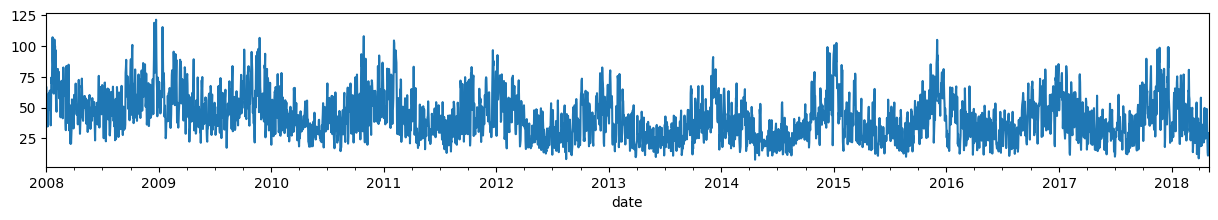

In [10]:
forNo2 = allMadrid['NO_2']
forNo2.plot(figsize=(15, 2))

In [11]:
X = forNo2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.235168
p-value: 0.000007
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Ora creiamo il modello per le previsioni. 
Il modello scelto è un AR(1), e lo costruiremo grazie alla classe `SARIMAX` di statsmodels.
Poi stimiamo i suoi parametri con il metodo `fit`. 
Infine con il metodo `summary` produrremo le diverse tabelle che mostrano i risultati.

In [25]:
# Costruiamo il modello AR(1)
mod = sm.tsa.SARIMAX(forNo2, order=(1, 0, 0), trend='c')
# Stimiamo i parametri del modello
res = mod.fit()
# Stampiamo i risultati
print(res.summary())

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NO_2   No. Observations:                 3774
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -14865.353
Date:                Tue, 29 Nov 2022   AIC                          29736.705
Time:                        09:24:05   BIC                          29755.413
Sample:                    01-01-2008   HQIC                         29743.356
                         - 05-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.2452      0.577     19.503      0.000      10.115      12.375
ar.L1          0.7367      0.011     67.235      0.000       0.715       0.758
sigma2       154.3971      3.292     46.904      0.0

Procediamo ora facendo il forecast, ovvero la previsione relativa ad altri 5 giorni del 2018

NO_2             mean    mean_se  mean_ci_lower  mean_ci_upper
2018-05-02  32.703013  12.425664      12.264615      53.141411
2018-05-03  35.339108  15.433846       9.952691      60.725525
2018-05-04  37.281247  16.843206       9.576638      64.985856
2018-05-05  38.712115  17.560908       9.826992      67.597239
2018-05-06  39.766305  17.938456      10.260170      69.272440


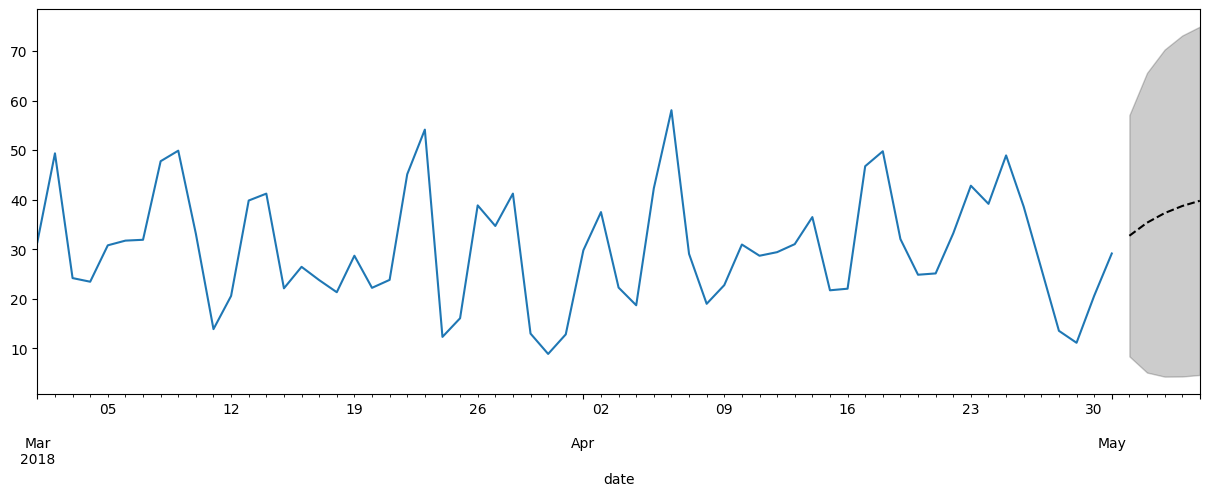

In [26]:
fcast_res1 = res.get_forecast(steps=5)
#stampiamo il forecast specificando per esso un intervallo di confidenza del 90%
print(fcast_res1.summary_frame(alpha=0.10))

fig, ax = plt.subplots(figsize=(15, 5))

# Mettiamo nel grafico i dati, prendendone un sotto insieme che va dal 2018-03-01 per rendere il tutto più visibile
forNo2.loc['2018-03-01':].plot(ax=ax)

# Costruiamo il forecast
fcast = res.get_forecast(steps=5).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.2)

In [27]:
nforecasts = 3
forecasts = {}

# Settiamo il numero di elementi del training set considerando di prendere l'80% dei dati a disposizione
nobs = len(forNo2)
n_init_training = int(nobs * 0.8)

# Creiamo il modello per il training
init_training_forNo2 = forNo2.iloc[:n_init_training]
mod = sm.tsa.SARIMAX(init_training_forNo2, order=(2, 0, 0), trend='c')
res = mod.fit()

# Salviamo il forecast iniziale
forecasts[init_training_forNo2.index[-2]] = res.forecast(steps=nforecasts)

# Andiamo avanti per i vari componenti del campione
for t in range(n_init_training, nobs):
    # aggiorniamo il risultato con l'append della nuova osservazione
    updated_forNo2 = forNo2.iloc[t:t+1]
    res = res.append(updated_forNo2, refit=False)
    # Salviasmo il nuovo insieme di forecasts
    forecasts[updated_forNo2.index[0]] = res.forecast(steps=nforecasts)

# Mettiamo insieme tutti i forecasts in un dataframe
forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:5, :5])

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


            2016-04-05  2016-04-07  2016-04-08  2016-04-09  2016-04-10
2016-04-07   36.789601         NaN         NaN         NaN         NaN
2016-04-08   38.783017   39.428884         NaN         NaN         NaN
2016-04-09   40.165216   40.622689   27.103176         NaN         NaN
2016-04-10         NaN   41.449200   31.873222   31.842543         NaN
2016-04-11         NaN         NaN   35.328371   35.306640    22.35714


In [28]:
# Calcoliamo l'errore del forecast
forecast_errors = forecasts.apply(lambda column: forNo2 - column).reindex(forecasts.index)
# Re-indicizziamo i forecasts 
def flatten(column):
    return column.dropna().reset_index(drop=True)

flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')

print(flattened.iloc[:3, :5])

         2016-04-05  2016-04-07  2016-04-08  2016-04-09  2016-04-10
horizon                                                            
1          0.819774  -17.159787   -0.038940  -16.436293    7.482021
2        -16.513920  -13.558453  -16.466972   -5.467479    6.122370
3        -13.100980  -26.042950   -5.489210   -3.049864   -3.615602


In [29]:
# Calcoliamo lo squarto quadratico medio
rmse = (flattened**2).mean(axis=1)**0.5

print(rmse)

horizon
1    12.221193
2    15.630926
3    16.605900
dtype: float64


## NO

Prendiamo i dati relativi al NO e stampiamo il suo andamento

<AxesSubplot: xlabel='date'>

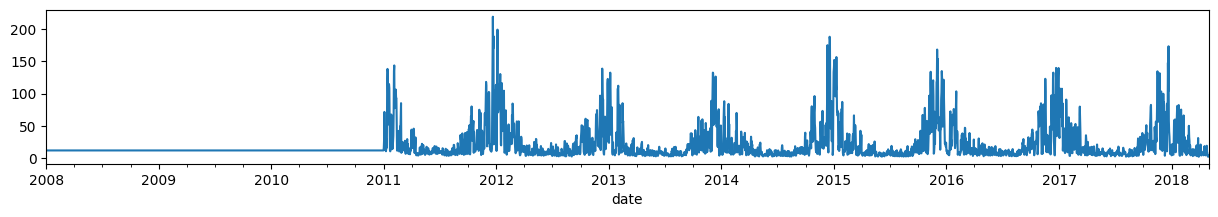

In [8]:
forNo = allMadrid['NO']
forNo.plot(figsize=(15, 2))

In [9]:
X1 = forNo.values
result1 = adfuller(X1)
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.617203
p-value: 0.000001
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Ora creiamo il modello per le previsioni. 
Il modello scelto è un AR(1), e lo costruiremo grazie alla classe `SARIMAX` di statsmodels.
Poi stimiamo i suoi parametri con il metodo `fit`. 
Infine con il metodo `summary` produrremo le diverse tabelle che mostrano i risultati.

In [31]:
# Costruiamo il modello AR(1)
mod1 = sm.tsa.SARIMAX(forNo, order=(1, 0, 0), trend='c')
# Stimiamo i parametri del modello
res1 = mod1.fit()
# Stampiamo i risultati
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:                     NO   No. Observations:                 3774
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -15510.325
Date:                Tue, 29 Nov 2022   AIC                          31026.649
Time:                        09:24:28   BIC                          31045.357
Sample:                    01-01-2008   HQIC                         31033.300
                         - 05-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0353      0.464      8.703      0.000       3.127       4.944
ar.L1          0.7988      0.006    139.438      0.000       0.788       0.810
sigma2       217.3779      2.251     96.552      0.0

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Procediamo ora facendo il forecast, ovvero la previsione relativa ad altri 5 giorni del 2018

NO               mean    mean_se  mean_ci_lower  mean_ci_upper
2018-05-02   6.331814  14.743740     -17.919480      30.583108
2018-05-03   9.093082  18.870059     -21.945403      40.131567
2018-05-04  11.298755  21.085057     -23.383077      45.980587
2018-05-05  13.060625  22.384117     -23.757972      49.879221
2018-05-06  14.467988  23.174979     -23.651460      52.587437


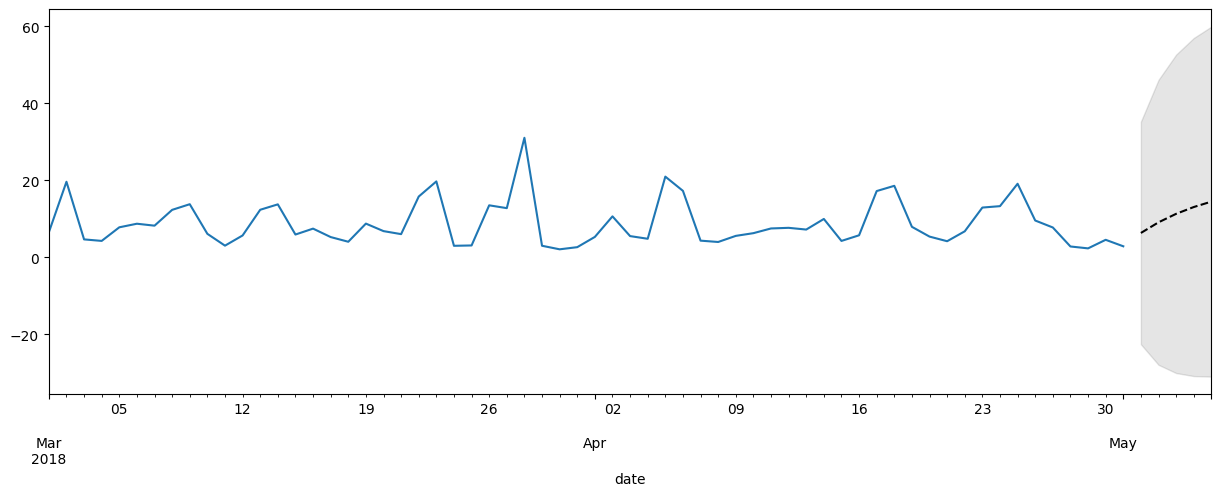

In [32]:
fcast_res11 = res1.get_forecast(steps=5)
#stampiamo il forecast specificando per esso un intervallo di confidenza del 90%
print(fcast_res11.summary_frame(alpha=0.10))

fig1, ax1 = plt.subplots(figsize=(15, 5))

# Mettiamo nel grafico i dati, prendendone un sotto insieme che va dal 2018-03-01 per rendere il tutto più visibile
forNo.loc['2018-03-01':].plot(ax=ax1)

# Costruiamo il forecast
fcast1 = res1.get_forecast(steps=5).summary_frame()
fcast1['mean'].plot(ax=ax1, style='k--')
ax1.fill_between(fcast1.index, fcast1['mean_ci_lower'], fcast1['mean_ci_upper'], color='k', alpha=0.1)

In [33]:
nforecasts1 = 3
forecasts1 = {}

# Settiamo il numero di elementi del training set considerando di prendere l'80% dei dati a disposizione
nobs1 = len(forNo)
n_init_training1 = int(nobs1 * 0.8)

# Creiamo il modello per il training
init_training_forNo = forNo.iloc[:n_init_training1]
mod1 = sm.tsa.SARIMAX(init_training_forNo, order=(1, 0, 0), trend='c')
res1 = mod1.fit()

# Salviamo il forecast iniziale
forecasts1[init_training_forNo.index[-1]] = res1.forecast(steps=nforecasts1)

# Andiamo avanti per i vari componenti del campione
for t in range(n_init_training1, nobs1):
    # aggiorniamo il risultato con l'append della nuova osservazione
    updated_forNo = forNo.iloc[t:t+1]
    res1 = res1.append(updated_forNo, refit=False)
    # Salviasmo il nuovo insieme di forecasts
    forecasts1[updated_forNo.index[0]] = res1.forecast(steps=nforecasts1)

# Mettiamo insieme tutti i forecasts in un dataframe
forecasts1 = pd.concat(forecasts1, axis=1)

print(forecasts1.iloc[:5, :5])

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


            2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10
2016-04-07   13.163608         NaN         NaN         NaN         NaN
2016-04-08   14.379440   14.787076         NaN         NaN         NaN
2016-04-09   15.361258   15.690436    9.116153         NaN         NaN
2016-04-10         NaN   16.419925   11.111006   10.568582         NaN
2016-04-11         NaN         NaN   12.721906   12.283883    6.659921


In [34]:
# Calcoliamo l'errore del forecast
forecast_errors1 = forecasts1.apply(lambda column1: forNo - column1).reindex(forecasts1.index)
# Re-indicizziamo i forecasts 
def flatten(column1):
    return column1.dropna().reset_index(drop=True)

flattened1 = forecast_errors1.apply(flatten)
flattened1.index = (flattened1.index + 1).rename('horizon')

print(flattened1.iloc[:3, :5])
# Calcoliamo lo squarto quadratico medio
rmse1 = (flattened1**2).mean(axis=1)**0.5

print(rmse1)

         2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10
horizon                                                            
1          0.504795   -8.141243   -0.671708   -6.964415    2.805114
2         -7.733606   -7.245992   -7.506839   -2.818848    0.858460
3         -6.916814  -12.815758   -3.256871   -3.683048   -2.762426
horizon
1    17.056060
2    22.009943
3    23.949029
dtype: float64


## SO2

Prendiamo i dati relativi al SO2 e stampiamo il suo andamento

<AxesSubplot: xlabel='date'>

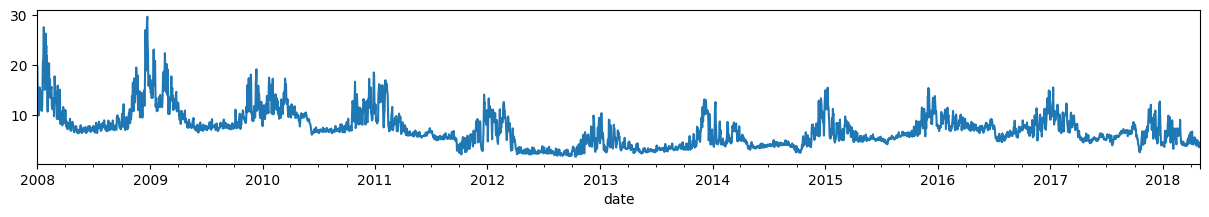

In [3]:
forSo = allMadrid['SO_2']
forSo.plot(figsize=(15, 2))

In [4]:
X2 = forSo.values
result2 = adfuller(X2)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.617670
p-value: 0.000120
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


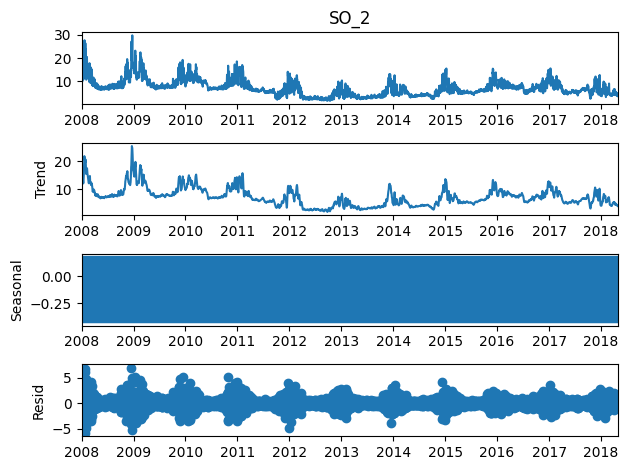

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec2 = seasonal_decompose(forSo, model='additive')
dec2.plot()
plt.show()

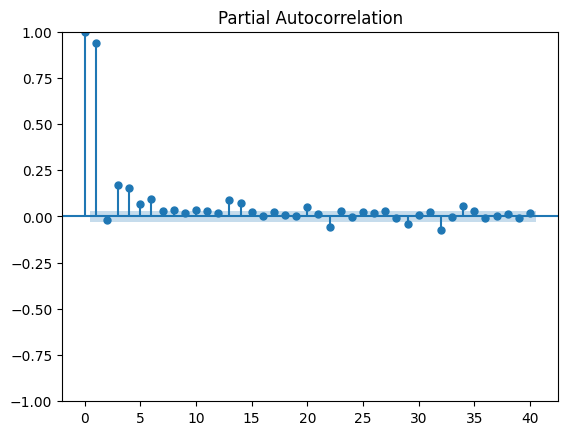

In [5]:
sm.graphics.tsa.plot_pacf(forSo.values.squeeze(), lags=40, method="ywm")
plt.show()

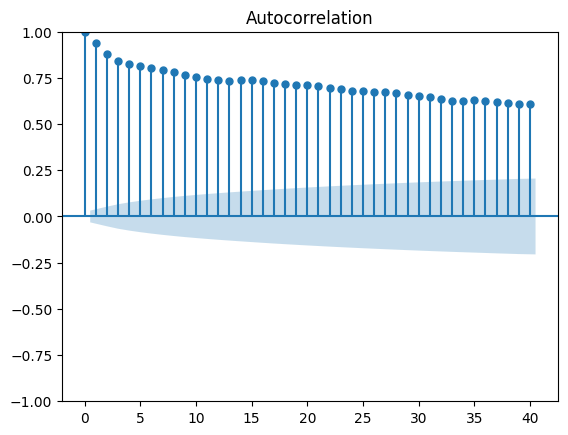

In [9]:
sm.graphics.tsa.plot_acf(forSo.values.squeeze(), lags=40)
plt.show()

Ora creiamo il modello per le previsioni. 
Il modello scelto è un AR(1), e lo costruiremo grazie alla classe `SARIMAX` di statsmodels.
Poi stimiamo i suoi parametri con il metodo `fit`. 
Infine con il metodo `summary` produrremo le diverse tabelle che mostrano i risultati.

In [14]:
# Costruiamo il modello AR(1)
mod2 = sm.tsa.SARIMAX(forSo, order=(2, 2, 1), trend='c')
# Stimiamo i parametri del modello
res2 = mod2.fit()
# Stampiamo i risultati
print(res2.summary())

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Program Files\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   SO_2   No. Observations:                 3774
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -5995.073
Date:                Tue, 29 Nov 2022   AIC                          12000.147
Time:                        14:00:46   BIC                          12031.323
Sample:                    01-01-2008   HQIC                         12011.231
                         - 05-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -4.17e-07   6.26e-05     -0.007      0.995      -0.000       0.000
ar.L1         -0.0026      0.009     -0.287      0.774      -0.021       0.015
ar.L2         -0.1951      0.009    -22.892      0.0

Procediamo ora facendo il forecast, ovvero la previsione relativa ad altri 5 giorni del 2018

SO_2            mean   mean_se  mean_ci_lower  mean_ci_upper
2018-05-02  4.452427  1.184907       2.503430       6.401425
2018-05-03  4.310910  1.673761       1.557819       7.064002
2018-05-04  4.315457  1.925251       1.148701       7.482212
2018-05-05  4.337945  2.148147       0.804557       7.871332
2018-05-06  4.331894  2.368748       0.435651       8.228138
2018-05-07  4.322419  2.570461       0.094387       8.550451
2018-05-08  4.318519  2.754391      -0.212051       8.849089
2018-05-09  4.315272  2.926913      -0.499071       9.129614
2018-05-10  4.310935  3.090458      -0.772416       9.394286
2018-05-11  4.306473  3.245854      -1.032481       9.645428
2018-05-12  4.302224  3.394129      -1.280621       9.885069
2018-05-13  4.297998  3.536274      -1.518654      10.114651
2018-05-14  4.293730  3.673016      -1.747844      10.335305
2018-05-15  4.289458  3.804922      -1.969083      10.547998
2018-05-16  4.285193  3.932475      -2.183153      10.753539
2018-05-17  4.280928  4.

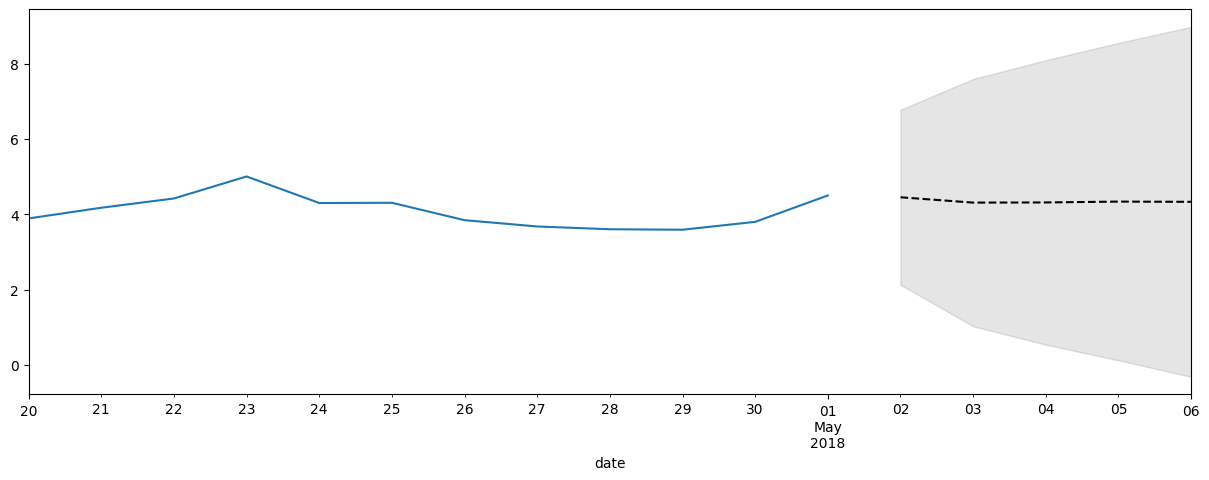

In [22]:
fcast_res12 = res2.get_forecast(steps=30)
#stampiamo il forecast specificando per esso un intervallo di confidenza del 90%
print(fcast_res12.summary_frame(alpha=0.10))

fig2, ax2 = plt.subplots(figsize=(15, 5))

# Mettiamo nel grafico i dati, prendendone un sotto insieme che va dal 2018-03-01 per rendere il tutto più visibile
forSo.loc['2018-04-20':].plot(ax=ax2)

# Costruiamo il forecast
fcast2 = res2.get_forecast(steps=5).summary_frame()
fcast2['mean'].plot(ax=ax2, style='k--')
ax2.fill_between(fcast2.index, fcast2['mean_ci_lower'], fcast2['mean_ci_upper'], color='k', alpha=0.1)

In [57]:
nforecasts2 = 30
forecasts2 = {}

# Settiamo il numero di elementi del training set considerando di prendere l'80% dei dati a disposizione
nobs2 = len(forSo)
n_init_training2 = int(nobs2 * 0.8)

# Creiamo il modello per il training
init_training_forSo = forSo.iloc[:n_init_training2]
mod2 = sm.tsa.SARIMAX(init_training_forSo, order=(2, 2, 1), trend='c')
res2 = mod2.fit()

# Salviamo il forecast iniziale
forecasts2[init_training_forSo.index[-1]] = res2.forecast(steps=nforecasts2)

# Andiamo avanti per i vari componenti del campione
for t in range(n_init_training2, nobs2):
    # aggiorniamo il risultato con l'append della nuova osservazione
    updated_forSo = forSo.iloc[t:t+1]
    res2 = res2.append(updated_forSo, refit=False)
    # Salviasmo il nuovo insieme di forecasts
    forecasts2[updated_forSo.index[0]] = res2.forecast(steps=nforecasts2)

# Mettiamo insieme tutti i forecasts in un dataframe
forecasts2 = pd.concat(forecasts2, axis=1)

print(forecasts2.iloc[:5, :5])

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


            2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10
2016-04-07    8.193036         NaN         NaN         NaN         NaN
2016-04-08    8.163331    8.120247         NaN         NaN         NaN
2016-04-09    8.192025    8.157487    8.458412         NaN         NaN
2016-04-10    8.201258    8.166721    8.407955    7.289954         NaN
2016-04-11    8.198863    8.162611    8.403833    7.507596    8.322724


    2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10  2016-04-11  \
0     8.193036    8.120247    8.458412    7.289954    8.322724    7.367833   
1     8.163331    8.157487    8.407955    7.507596    8.174514    7.487552   
2     8.192025    8.166721    8.403833    7.521073    8.134222    7.520340   
3     8.201258    8.162611    8.417265    7.480814    8.166978    7.499588   
4     8.198863    8.164067    8.421498    7.481130    8.178328    7.496091   
5     8.200335    8.168187    8.422237    7.492173    8.175136    7.503263   
6     8.204128    8.171206    8.424808    7.495157    8.176195    7.507015   
7     8.207158    8.173699    8.428080    7.496006    8.180155    7.508647   
8     8.209731    8.176416    8.430993    7.498461    8.183276    7.510963   
9     8.212460    8.179242    8.433772    7.501347    8.185825    7.513706   
10    8.215285    8.182029    8.436626    7.503919    8.188544    7.516318   
11    8.218084    8.184798    8.439512    7.506409    8.191383  

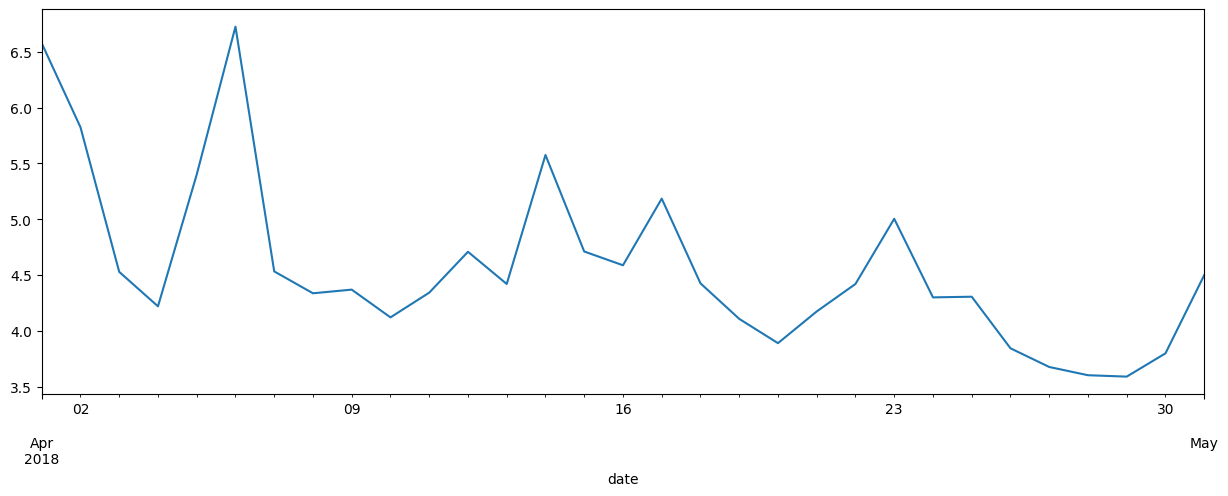

In [60]:
fig22, ax22 = plt.subplots(figsize=(15, 5))

# Mettiamo nel grafico i dati, prendendone un sotto insieme che va dal 2018-03-01 per rendere il tutto più visibile
forSo.loc['2018-04-01':].plot(ax=ax22)
#init_training_forSo[3000:].plot(ax=ax22)
def flatten(column):
    return column.dropna().reset_index(drop=True)

fcast22 = forecasts2.apply(flatten)
# Costruiamo il forecast

print(fcast22)
#fcast2['mean'].plot(ax=ax22, style='k--')
#ax22.fill_between(fcast2.index, fcast2['mean_ci_lower'], fcast2['mean_ci_upper'], color='k', alpha=0.1)

In [42]:
# Calcoliamo l'errore del forecast
forecast_errors2 = forecasts2.apply(lambda column2: forSo - column2).reindex(forecasts2.index)
# Re-indicizziamo i forecasts 
def flatten(column2):
    return column2.dropna().reset_index(drop=True)

flattened2 = forecast_errors2.apply(flatten)
flattened2.index = (flattened2.index + 1).rename('horizon')

print(flattened2.iloc[:3, :5])
# Calcoliamo lo squarto quadratico medio
rmse2 = (flattened2**2).mean(axis=1)**0.5

print(rmse2)

         2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10
horizon                                                            
1         -0.119590    0.312675   -1.022420    0.759856   -0.547899
2          0.199666   -0.726953   -0.206297    0.170140   -0.860329
3         -0.833743    0.072909   -0.742842   -0.181807   -0.954767
horizon
1    0.919724
2    1.272861
3    1.451629
dtype: float64


## PM10

Prendiamo i dati relativi al PM10 e stampiamo il suo andamento

<AxesSubplot: xlabel='date'>

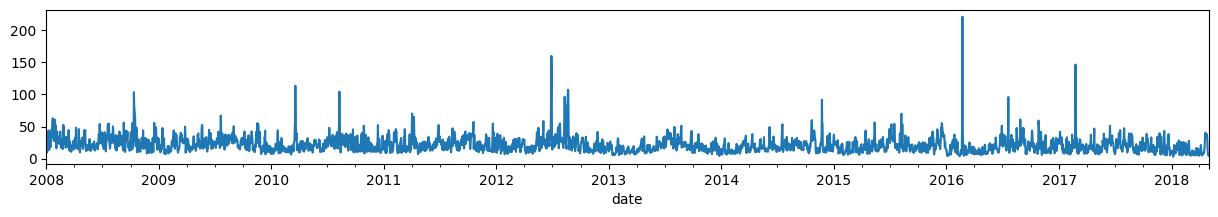

In [12]:
forPm10 = allMadrid['PM10']
forPm10.plot(figsize=(15, 2))

In [13]:
X3 = forPm10.values
result3 = adfuller(X3)
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])
print('Critical Values:')
for key, value in result3[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.115729
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [44]:
# Costruiamo il modello AR(1)
mod3 = sm.tsa.SARIMAX(forPm10, order=(1, 0, 0), trend='c')
# Stimiamo i parametri del modello
res3 = mod3.fit()
# Stampiamo i risultati
print(res3.summary())

                               SARIMAX Results                                
Dep. Variable:                   PM10   No. Observations:                 3774
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -13722.281
Date:                Tue, 29 Nov 2022   AIC                          27450.562
Time:                        09:27:17   BIC                          27469.270
Sample:                    01-01-2008   HQIC                         27457.213
                         - 05-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.0972      0.241     29.481      0.000       6.625       7.569
ar.L1          0.6698      0.004    185.295      0.000       0.663       0.677
sigma2        84.2422      0.417    201.883      0.0

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Procediamo ora facendo il forecast, ovvero la previsione relativa ad altri 5 giorni del 2018

PM10             mean    mean_se  mean_ci_lower  mean_ci_upper
2018-05-02  10.085551   9.178353      -5.011496      25.182599
2018-05-03  13.852522  11.046992      -4.318163      32.023208
2018-05-04  16.375644  11.789472      -3.016311      35.767600
2018-05-05  18.065634  12.107787      -1.849903      37.981172
2018-05-06  19.197592  12.247906      -0.948420      39.343604


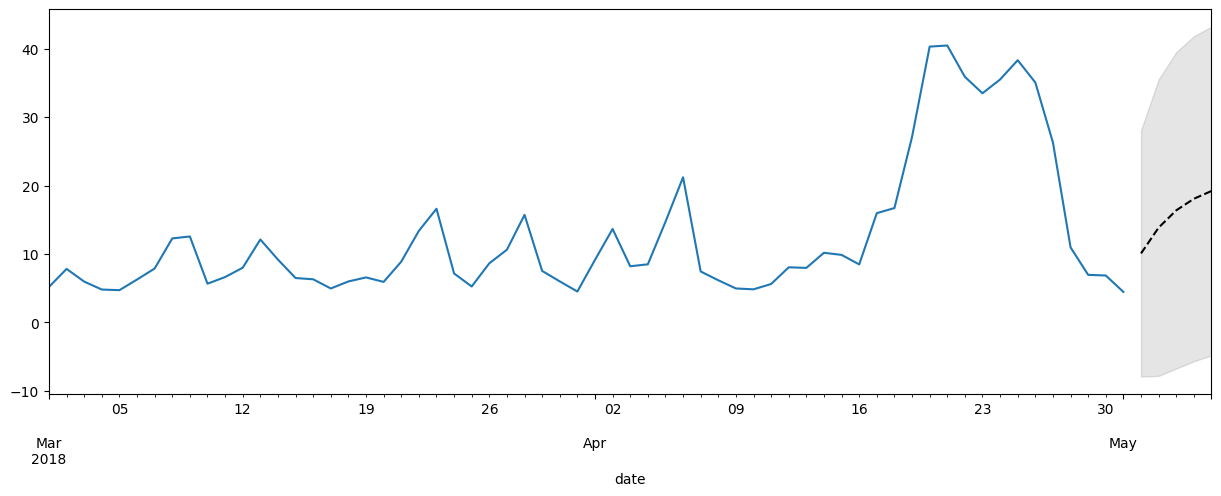

In [45]:
fcast_res13 = res3.get_forecast(steps=5)
#stampiamo il forecast specificando per esso un intervallo di confidenza del 90%
print(fcast_res13.summary_frame(alpha=0.10))

fig3, ax3 = plt.subplots(figsize=(15, 5))

# Mettiamo nel grafico i dati, prendendone un sotto insieme che va dal 2018-03-01 per rendere il tutto più visibile
forPm10.loc['2018-03-01':].plot(ax=ax3)

# Costruiamo il forecast
fcast3 = res3.get_forecast(steps=5).summary_frame()
fcast3['mean'].plot(ax=ax3, style='k--')
ax3.fill_between(fcast3.index, fcast3['mean_ci_lower'], fcast3['mean_ci_upper'], color='k', alpha=0.1)

In [46]:
nforecasts3 = 3
forecasts3 = {}

# Settiamo il numero di elementi del training set considerando di prendere l'80% dei dati a disposizione
nobs3 = len(forPm10)
n_init_training3 = int(nobs3 * 0.8)

# Creiamo il modello per il training
init_training_forPm10 = forPm10.iloc[:n_init_training3]
mod3 = sm.tsa.SARIMAX(init_training_forPm10, order=(1, 0, 0), trend='c')
res3 = mod3.fit()

# Salviamo il forecast iniziale
forecasts3[init_training_forPm10.index[-1]] = res3.forecast(steps=nforecasts3)

# Andiamo avanti per i vari componenti del campione
for t in range(n_init_training3, nobs3):
    # aggiorniamo il risultato con l'append della nuova osservazione
    updated_forPm10 = forPm10.iloc[t:t+1]
    res3 = res3.append(updated_forPm10, refit=False)
    # Salviasmo il nuovo insieme di forecasts
    forecasts3[updated_forPm10.index[0]] = res3.forecast(steps=nforecasts3)

# Mettiamo insieme tutti i forecasts in un dataframe
forecasts3 = pd.concat(forecasts3, axis=1)

print(forecasts3.iloc[:5, :5])

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


            2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10
2016-04-07   13.419448         NaN         NaN         NaN         NaN
2016-04-08   16.273559   15.009988         NaN         NaN         NaN
2016-04-09   18.190565   17.341869   11.936189         NaN         NaN
2016-04-10         NaN   18.908111   15.277306   14.331326         NaN
2016-04-11         NaN         NaN   17.521417   16.886036   13.106938


In [47]:
# Calcoliamo l'errore del forecast
forecast_errors3 = forecasts3.apply(lambda column3: forPm10 - column3).reindex(forecasts3.index)
# Re-indicizziamo i forecasts 
def flatten(column3):
    return column3.dropna().reset_index(drop=True)

flattened3 = forecast_errors3.apply(flatten)
flattened3.index = (flattened3.index + 1).rename('horizon')

print(flattened3.iloc[:3, :5])
# Calcoliamo lo squarto quadratico medio
rmse3 = (flattened3**2).mean(axis=1)**0.5

print(rmse3)

         2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10
horizon                                                            
1         -1.881254   -8.048182   -1.408411   -5.626465    -3.58229
2         -9.311754   -6.814091   -6.572445   -7.361388    -8.08114
3         -7.662787  -10.203250   -7.996769  -10.619426   -10.06347
horizon
1     8.763312
2    10.930781
3    11.348980
dtype: float64


## PM25

Prendiamo i dati relativi al PM25 e stampiamo il suo andamento

<AxesSubplot: xlabel='date'>

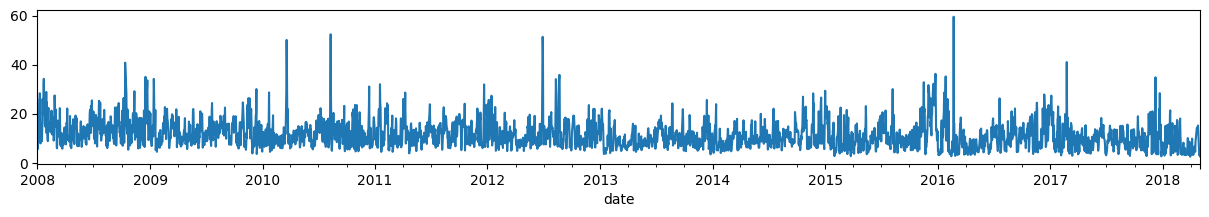

In [14]:
forPm25 = allMadrid['PM25']
forPm25.plot(figsize=(15, 2))

In [15]:
X4 = forPm25.values
result4 = adfuller(X4)
print('ADF Statistic: %f' % result4[0])
print('p-value: %f' % result4[1])
print('Critical Values:')
for key, value in result4[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.677751
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [49]:
# Costruiamo il modello AR(1)
mod4 = sm.tsa.SARIMAX(forPm25, order=(1, 0, 0), trend='c')
# Stimiamo i parametri del modello
res4 = mod4.fit()
# Stampiamo i risultati
print(res4.summary())

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   PM25   No. Observations:                 3774
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -10696.106
Date:                Tue, 29 Nov 2022   AIC                          21398.211
Time:                        09:28:08   BIC                          21416.919
Sample:                    01-01-2008   HQIC                         21404.862
                         - 05-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.7820      0.147     25.707      0.000       3.494       4.070
ar.L1          0.6699      0.008     87.977      0.000       0.655       0.685
sigma2        16.9503      0.192     88.489      0.0

Procediamo ora facendo il forecast, ovvero la previsione relativa ad altri 5 giorni del 2018

PM25             mean   mean_se  mean_ci_lower  mean_ci_upper
2018-05-02   5.568430  4.117069      -1.203546      12.340406
2018-05-03   7.512393  4.955554      -0.638768      15.663553
2018-05-04   8.814701  5.288823       0.115362      17.514040
2018-05-05   9.687149  5.431749       0.752717      18.621582
2018-05-06  10.271624  5.494686       1.233669      19.309578


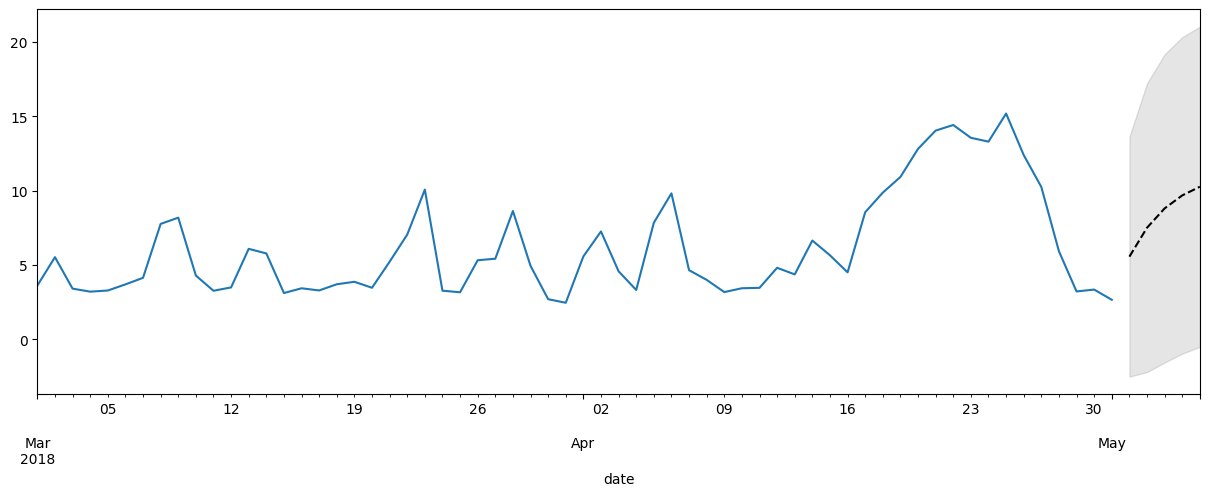

In [50]:
fcast_res14 = res4.get_forecast(steps=5)
#stampiamo il forecast specificando per esso un intervallo di confidenza del 90%
print(fcast_res14.summary_frame(alpha=0.10))

fig4, ax4 = plt.subplots(figsize=(15, 5))

# Mettiamo nel grafico i dati, prendendone un sotto insieme che va dal 2018-03-01 per rendere il tutto più visibile
forPm25.loc['2018-03-01':].plot(ax=ax4)

# Costruiamo il forecast
fcast4 = res4.get_forecast(steps=5).summary_frame()
fcast4['mean'].plot(ax=ax4, style='k--')
ax4.fill_between(fcast4.index, fcast4['mean_ci_lower'], fcast4['mean_ci_upper'], color='k', alpha=0.1)

In [51]:
nforecasts4 = 3
forecasts4 = {}

# Settiamo il numero di elementi del training set considerando di prendere l'80% dei dati a disposizione
nobs4 = len(forPm25)
n_init_training4 = int(nobs4 * 0.8)

# Creiamo il modello per il training
init_training_forPm25 = forPm25.iloc[:n_init_training4]
mod4 = sm.tsa.SARIMAX(init_training_forPm25, order=(1, 0, 0), trend='c')
res4 = mod4.fit()

# Salviamo il forecast iniziale
forecasts4[init_training_forPm25.index[-1]] = res4.forecast(steps=nforecasts4)

# Andiamo avanti per i vari componenti del campione
for t in range(n_init_training4, nobs4):
    # aggiorniamo il risultato con l'append della nuova osservazione
    updated_forPm25 = forPm25.iloc[t:t+1]
    res4 = res4.append(updated_forPm25, refit=False)
    # Salviasmo il nuovo insieme di forecasts
    forecasts4[updated_forPm25.index[0]] = res4.forecast(steps=nforecasts4)

# Mettiamo insieme tutti i forecasts in un dataframe
forecasts4 = pd.concat(forecasts4, axis=1)

print(forecasts4.iloc[:5, :5])

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


            2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10
2016-04-07    7.440559         NaN         NaN         NaN         NaN
2016-04-08    8.935016    8.269686         NaN         NaN         NaN
2016-04-09    9.926290    9.484976    6.127776         NaN         NaN
2016-04-10         NaN   10.291080    8.064245    7.468197         NaN
2016-04-11         NaN         NaN    9.348707    8.953348    6.952296


In [52]:
# Calcoliamo l'errore del forecast
forecast_errors4 = forecasts4.apply(lambda column4: forPm25 - column4).reindex(forecasts4.index)
# Re-indicizziamo i forecasts 
def flatten(column4):
    return column4.dropna().reset_index(drop=True)

flattened4 = forecast_errors4.apply(flatten)
flattened4.index = (flattened4.index + 1).rename('horizon')

print(flattened4.iloc[:3, :5])
# Calcoliamo lo squarto quadratico medio
rmse4 = (flattened4**2).mean(axis=1)**0.5

print(rmse4)

         2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10
horizon                                                            
1         -1.003059   -5.061352   -0.898609   -3.016808   -2.507852
2         -5.726683   -4.255810   -3.612856   -4.508903   -3.385798
3         -4.697124   -5.839691   -4.904263   -4.713098   -4.683692
horizon
1    3.891913
2    4.859071
3    5.149910
dtype: float64
